In [29]:
import matplotlib.pyplot as plt
from helpers.cm26 import DatasetCM26
from helpers.computational_tools import select_NA, StateFunctions, compare
import numpy as np
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
ds = DatasetCM26()

In [31]:
exp = StateFunctions(ds.data, ds.param, ds.grid)

In [32]:
zb = exp.ZB20()

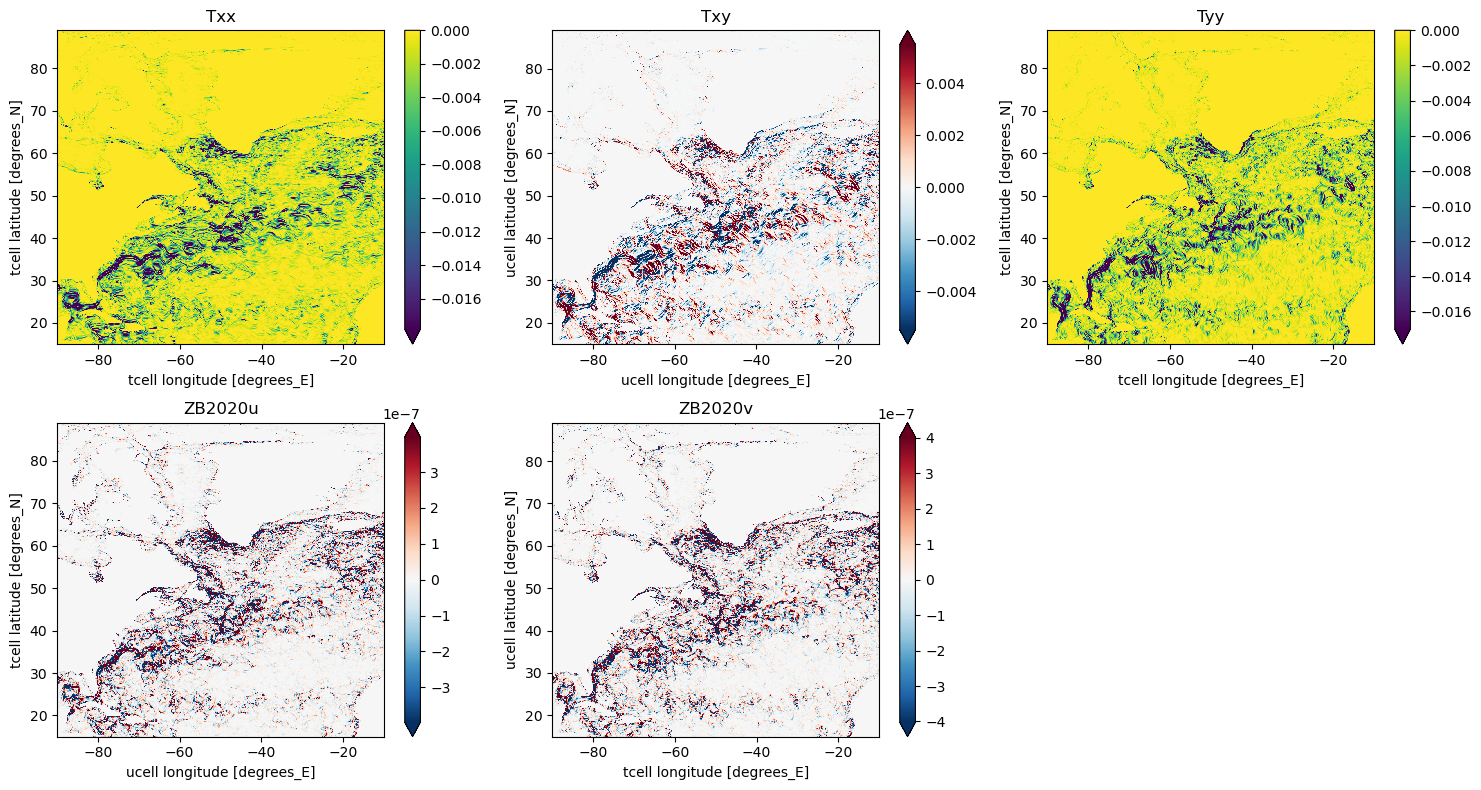

In [33]:
plt.figure(figsize=(15,8))
for j,key in enumerate(['Txx', 'Txy', 'Tyy', 'ZB2020u', 'ZB2020v']):
    plt.subplot(2,3,j+1)
    select_NA(zb[key]).plot(robust=True)
    plt.title(key)
plt.tight_layout()

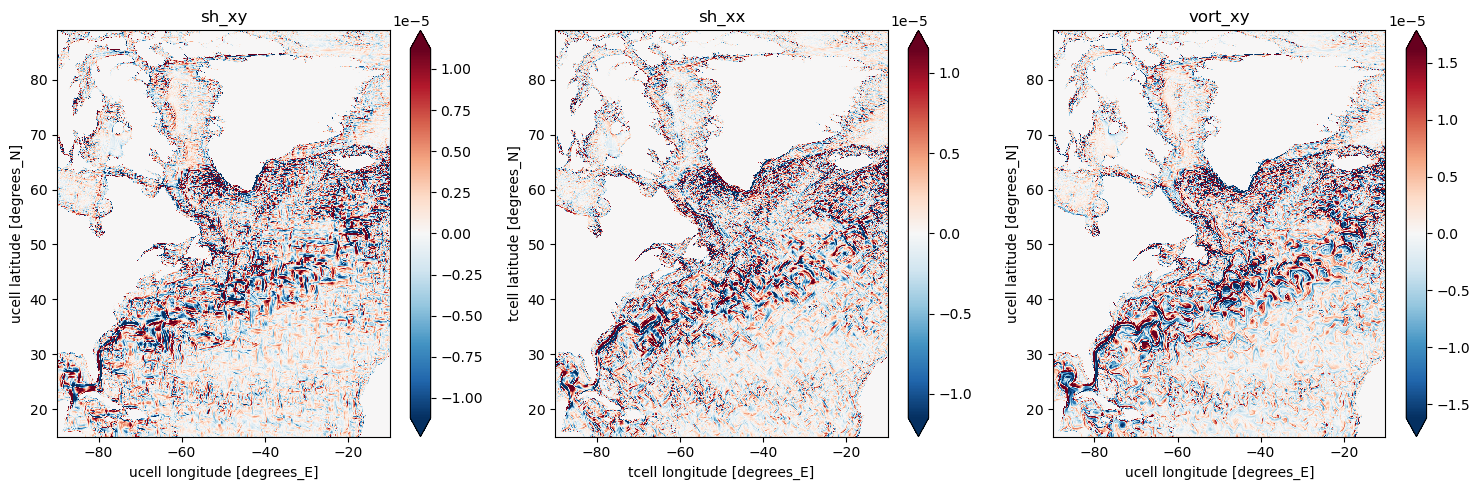

In [34]:
sh_xy, sh_xx, vort_xy = exp.velocity_gradients()
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
select_NA(sh_xy).plot(robust=True); plt.title('sh_xy')
plt.subplot(1,3,2)
select_NA(sh_xx).plot(robust=True); plt.title('sh_xx')
plt.subplot(1,3,3)
select_NA(vort_xy).plot(robust=True); plt.title('vort_xy')
plt.tight_layout()

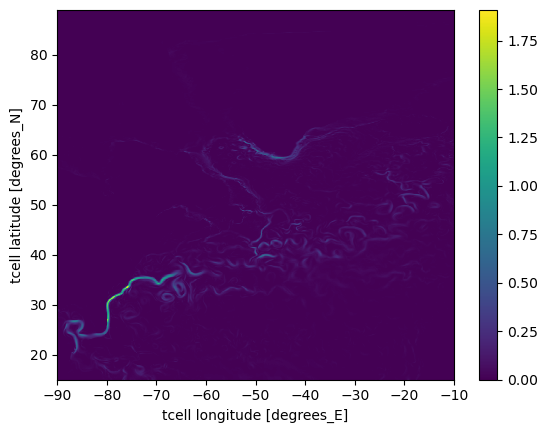

In [35]:
select_NA(exp.KE_Arakawa()).plot()

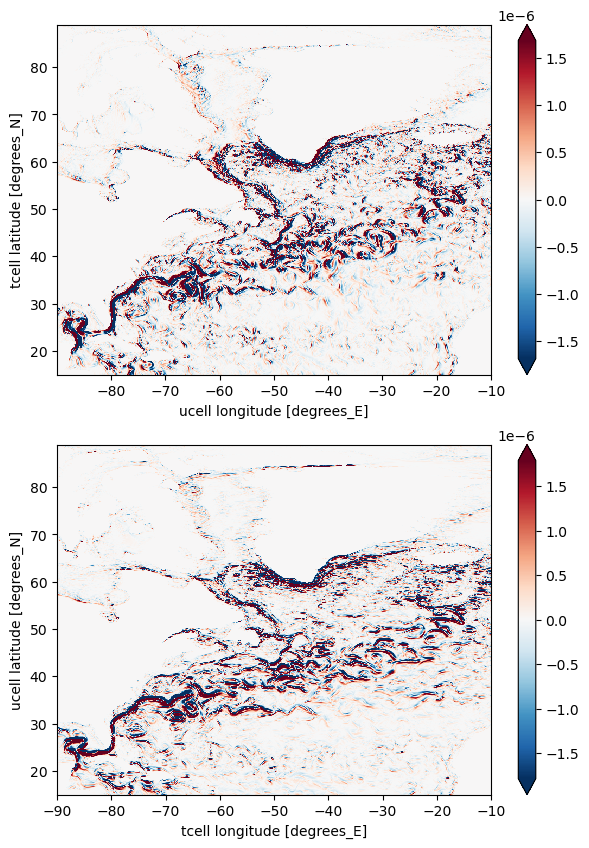

In [36]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1); select_NA(exp.gradKE()[0]).plot(robust=True)
plt.subplot(2,1,2); select_NA(exp.gradKE()[1]).plot(robust=True)

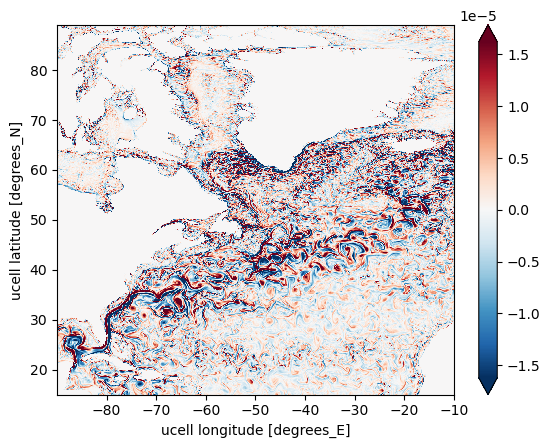

In [37]:
select_NA(exp.relative_vorticity()).plot(robust=True)

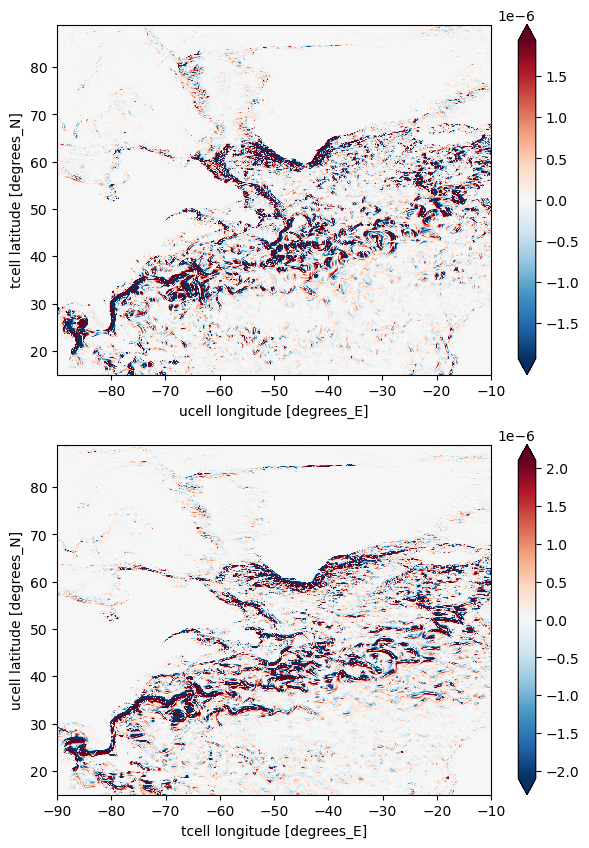

In [38]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1); select_NA(exp.PV_cross_uv()[0]).plot(robust=True)
plt.subplot(2,1,2); select_NA(exp.PV_cross_uv()[1]).plot(robust=True)

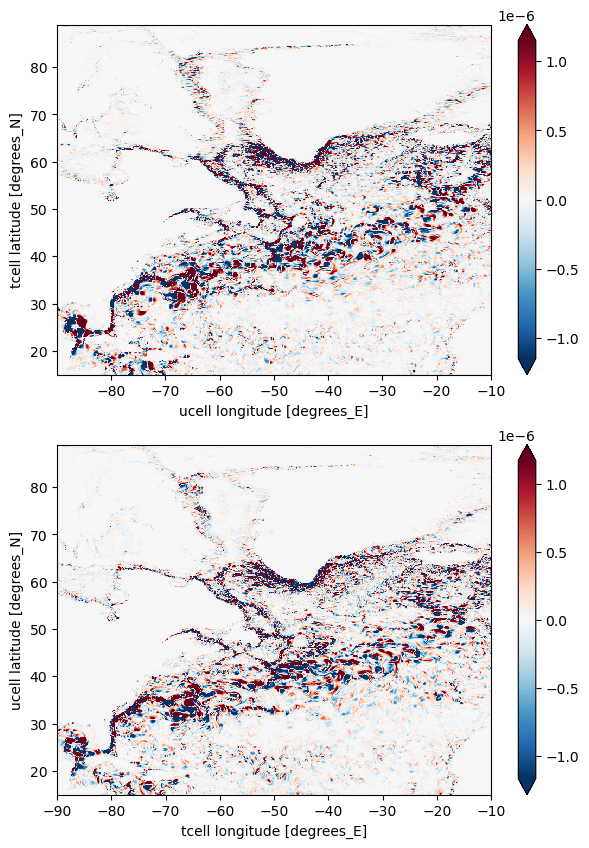

In [39]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1); select_NA(exp.advection()[0]).plot(robust=True)
plt.subplot(2,1,2); select_NA(exp.advection()[1]).plot(robust=True)

# Comparison of two forms of vorticity

Relative Error: 3.995716349043335e-05
Nans: 0


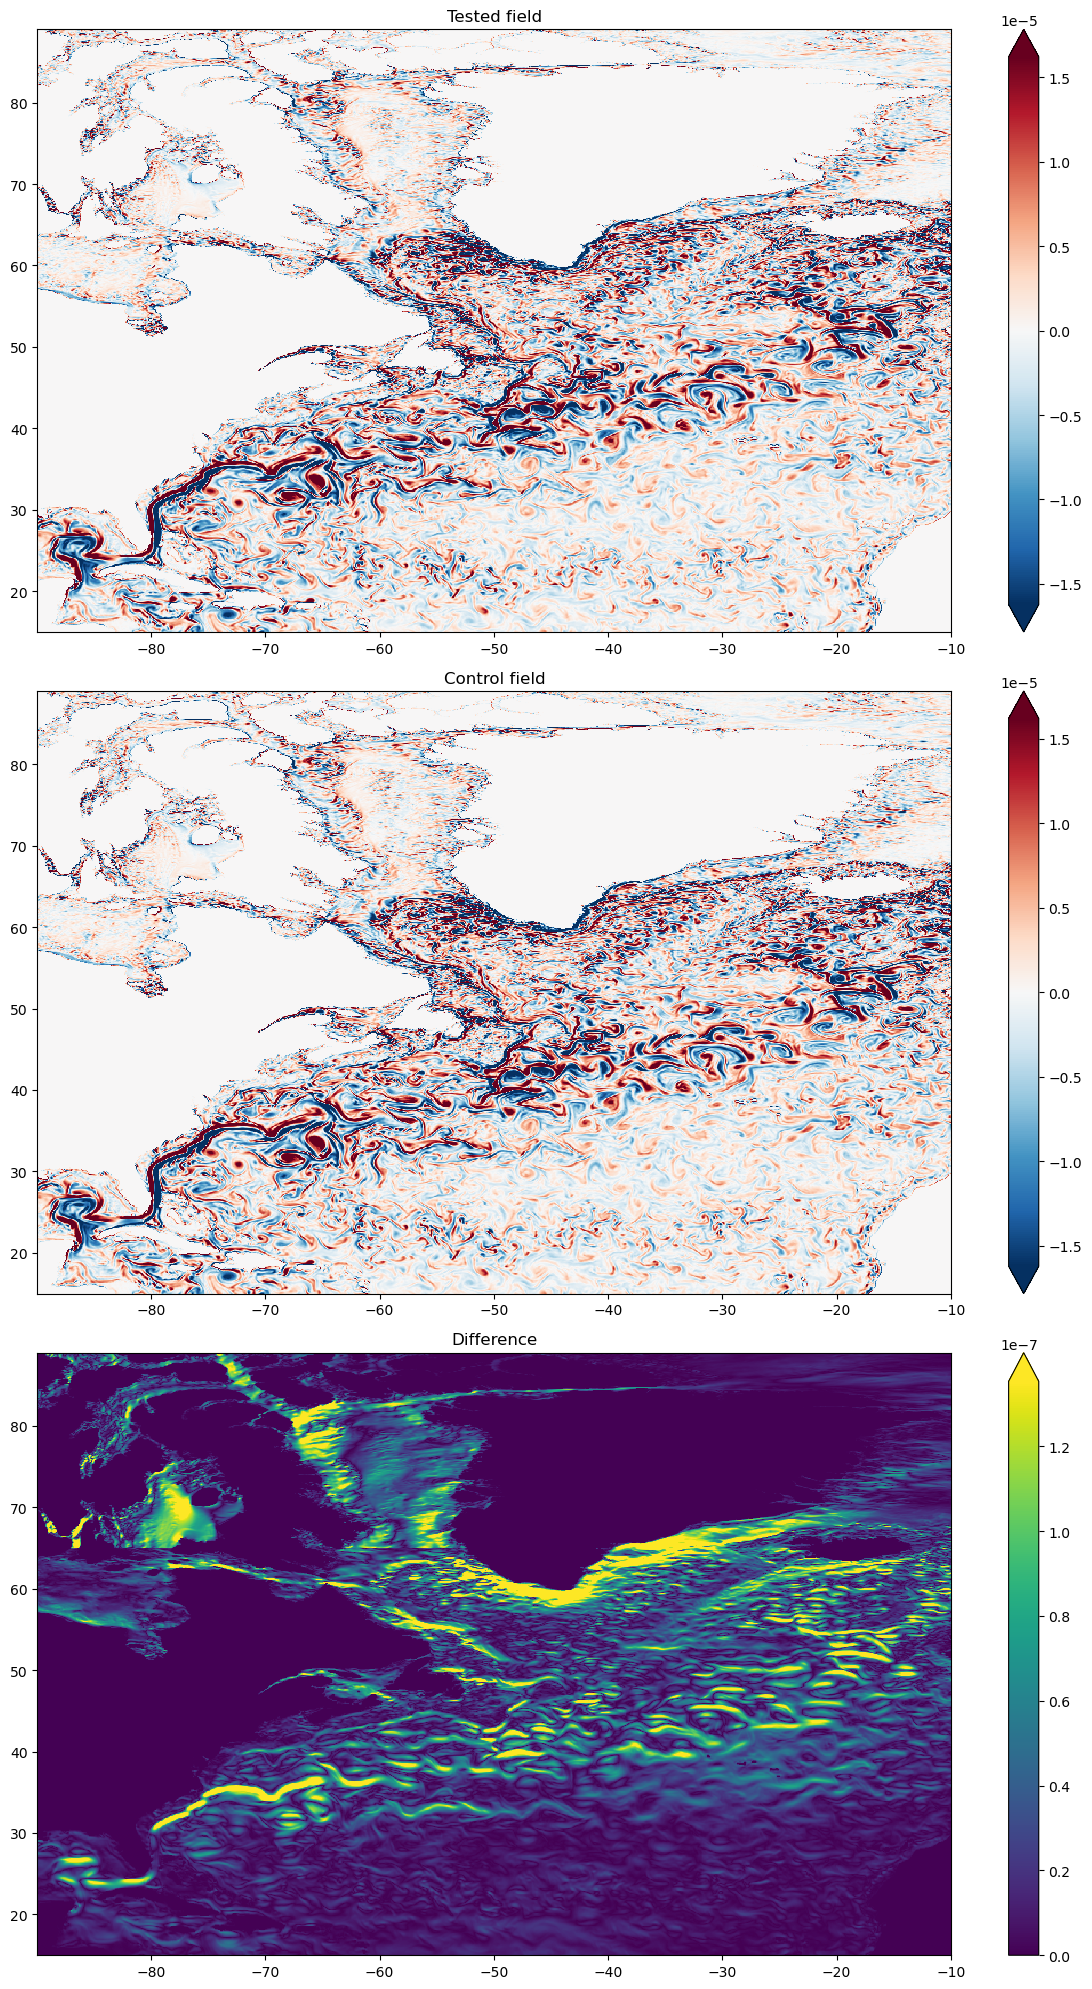

In [41]:
compare(exp.velocity_gradients()[2], exp.relative_vorticity(), exp.param.wet_c)